# **OBESITY LEVEL**

In [ ]:
# Package Functions Import
import numpy as np
import pandas as pd
# visualization
import matplotlib.pyplot as plt
# advanced visitualization
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/obesity_level.csv')
df.head(10)

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,0be1dad
0,0,Male,24.443011,1.699998,81.669950,1,1,2.000000,2.983297,Sometimes,0,2.763573,0,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,1,1,2.000000,3.000000,Frequently,0,2.000000,0,1.000000,1.000000,0,Automobile,0rmal_Weight
2,2,Female,18.000000,1.711460,50.165754,1,1,1.880534,1.411685,Sometimes,0,1.910378,0,0.866045,1.673584,0,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,1,1,3.000000,3.000000,Sometimes,0,1.674061,0,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,1,1,2.679664,1.971472,Sometimes,0,1.979848,0,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II
5,5,Male,18.128249,1.748524,51.552595,1,1,2.919751,3.000000,Sometimes,0,2.137550,0,1.930033,1.000000,Sometimes,Public_Transportation,Insufficient_Weight
6,6,Male,29.883021,1.754711,112.725005,1,1,1.991240,3.000000,Sometimes,0,2.000000,0,0.000000,0.696948,Sometimes,Automobile,Obesity_Type_II
7,7,Male,29.891473,1.750150,118.206565,1,1,1.397468,3.000000,Sometimes,0,2.000000,0,0.598655,0.000000,Sometimes,Automobile,Obesity_Type_II
8,8,Male,17.000000,1.700000,70.000000,0,1,2.000000,3.000000,Sometimes,0,3.000000,1,1.000000,1.000000,0,Public_Transportation,Overweight_Level_I
9,9,Female,26.000000,1.638836,111.275646,1,1,3.000000,3.000000,Sometimes,0,2.632253,0,0.000000,0.218645,Sometimes,Public_Transportation,Obesity_Type_III


In [ ]:
print(df.head())

   id  Gender        Age    Height      Weight  \
0   0    Male  24.443011  1.699998   81.669950   
1   1  Female  18.000000  1.560000   57.000000   
2   2  Female  18.000000  1.711460   50.165754   
3   3  Female  20.952737  1.710730  131.274851   
4   4    Male  31.641081  1.914186   93.798055   

   family_history_with_overweight  FAVC      FCVC       NCP        CAEC  \
0                               1     1  2.000000  2.983297   Sometimes   
1                               1     1  2.000000  3.000000  Frequently   
2                               1     1  1.880534  1.411685   Sometimes   
3                               1     1  3.000000  3.000000   Sometimes   
4                               1     1  2.679664  1.971472   Sometimes   

   SMOKE      CH2O  SCC       FAF       TUE       CALC                 MTRANS  \
0      0  2.763573    0  0.000000  0.976473  Sometimes  Public_Transportation   
1      0  2.000000    0  1.000000  1.000000          0             Automobile   
2    

In [ ]:
df.shape #find row and columns
df.info() #find data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  int64  
 6   FAVC                            20758 non-null  int64  
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  int64  
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [ ]:
df.isnull().sum() #Findout the null values of any column

,0
id,0
Gender,0
Age,0
Height,0
Weight,0
family_history_with_overweight,0
FAVC,0
FCVC,0
NCP,0
CAEC,0


# **CHART**

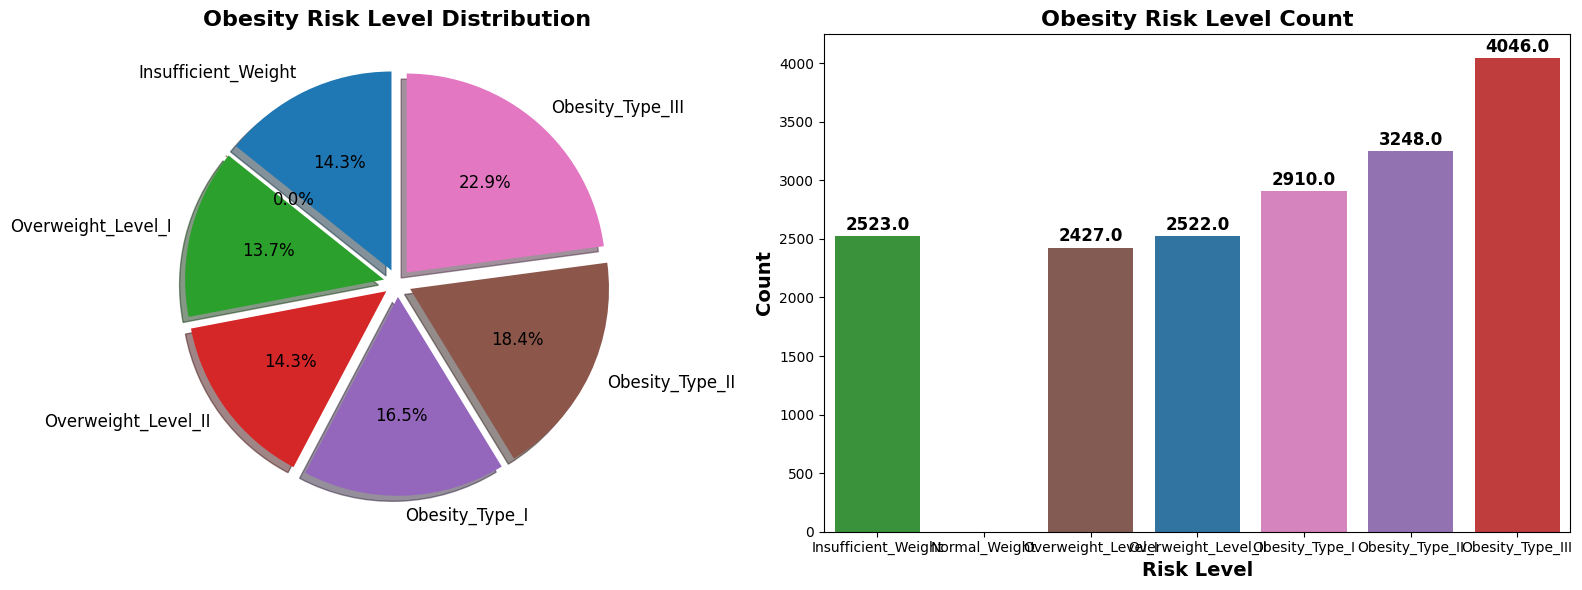

In [ ]:
# Clean column names and map the last column to "RiskLevel"
df.columns = df.columns.str.strip()
df.rename(columns={'0be1dad': 'RiskLevel'}, inplace=True)

# Define deep, bold colors and order for risk levels
p_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']
risk_order = ["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", "Overweight_Level_II",
              "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"]

# Create the plot
fig, ax = plt.subplots(1, 2, figsize=(16, 6), gridspec_kw={'width_ratios': [1, 1.5]})

# Pie chart with deep colors and updated layout
df['RiskLevel'].value_counts().reindex(risk_order).plot(
    kind="pie", labels=risk_order, colors=p_colors, explode=[0.07] * 7,
    autopct='%1.1f%%', ax=ax[0], shadow=True, startangle=90, textprops={'fontsize': 12})
ax[0].set_title("Obesity Risk Level Distribution", fontsize=16, fontweight='bold')
ax[0].set_ylabel('')

# Bar chart with deep color palette and bold formatting
count = sns.countplot(x="RiskLevel", data=df, ax=ax[1], order=risk_order, hue="RiskLevel", palette=p_colors, legend=False)

# Add annotations
for bar in count.patches:
    count.annotate(format(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                   ha='center', va='center', size=12, xytext=(0, 8),
                   textcoords='offset points', fontweight='bold')

ax[1].set_title("Obesity Risk Level Count", fontsize=16, fontweight='bold')
ax[1].set_xlabel("Risk Level", fontsize=14, fontweight='bold')
ax[1].set_ylabel("Count", fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split as split,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, confusion_matrix


# **TRAIN & TEST DATA**

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split # Import train_test_split

# Clean column names and map RiskLevel
df.columns = df.columns.str.strip()
df.rename(columns={'0be1dad': 'RiskLevel'}, inplace=True)

# Mapping RiskLevel to high, mid, and low categories
risk_mapping = {
    "Insufficient_Weight": "low",
    "Normal_Weight": "low",
    "Overweight_Level_I": "mid",
    "Overweight_Level_II": "mid",
    "Obesity_Type_I": "high",
    "Obesity_Type_II": "high",
    "Obesity_Type_III": "high"
}
df['RiskLevel'] = df['RiskLevel'].map(risk_mapping)

# Define features (X) and target variable (y)
X = df.drop("RiskLevel", axis=1)
y = df['RiskLevel']

# Split the dataset into training and testing sets (80% training, 20% testing)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

# Optional: Check the shape of the train and test sets
print(f"x_train shape: {x_train.shape}, y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}, y_test shape: {y_test.shape}")

x_train shape: (16606, 17), y_train shape: (16606,)
x_test shape: (4152, 17), y_test shape: (4152,)


# **DecisionTreeClassifier**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder # Import LabelEncoder for encoding categorical features


# Step 1: Load the dataset (adjust the path if necessary)
file_path = '/mnt/data/obesity_level.csv'
data = pd.read_csv('/content/obesity_level.csv')

# Step 2: Select features and target
X = data.drop(columns=['id', '0be1dad'])  # Features (excluding 'id' and target)
y = data['0be1dad']  # Target variable (obesity level)

# Step 3: Convert categorical features (like 'Gender') to numerical using Label Encoding
for col in X.select_dtypes(include=['object']).columns: # Iterate over object (string) type columns
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col]) # Encode the column using LabelEncoder

# Step 4: Split the dataset into training and testing sets (80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

# Step 5: Create a Decision Tree Classifier object
dt = DecisionTreeClassifier(random_state=50)  # DecisionTreeClassifier classification algorithm

# Step 6: Train the model using the training data
dt.fit(x_train, y_train)

# Step 7: Make predictions on the test data
y_pred = dt.predict(x_test)

# Step 8: Evaluate the model's accuracy
print(f"Test Accuracy: {accuracy_score(y_test, y_pred)}")

Test Accuracy: 0.8424855491329479


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, dt.predict(x_test)))

                     precision    recall  f1-score   support

       0rmal_Weight       0.79      0.75      0.77       583
Insufficient_Weight       0.88      0.89      0.88       487
     Obesity_Type_I       0.80      0.79      0.80       575
    Obesity_Type_II       0.94      0.95      0.94       658
   Obesity_Type_III       0.99      1.00      1.00       815
 Overweight_Level_I       0.69      0.70      0.70       529
Overweight_Level_II       0.70      0.72      0.71       505

           accuracy                           0.84      4152
          macro avg       0.83      0.83      0.83      4152
       weighted avg       0.84      0.84      0.84      4152



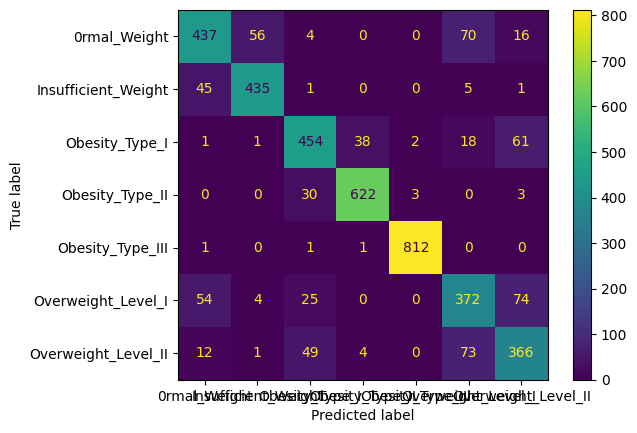

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Assuming 'dt' is your fitted model and 'x_test', 'y_test' are your test data
y_pred = dt.predict(x_test)
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt.classes_)
disp.plot()
plt.show()

# **RandomForestClassifier**

In [ ]:
rm = RandomForestClassifier(random_state=50)  #RandomForestClassifier classification algorithm
rm.fit(x_train, y_train)
y_pred = rm.predict(x_test)
print(f"Test Accuracy: {accuracy_score(y_test, y_pred)}")

Test Accuracy: 0.8971579961464354


In [ ]:
EtC = ExtraTreesClassifier(random_state=50)  #ExtraTreesClassifier classification algorithm
EtC.fit(x_train, y_train)
y_pred = EtC.predict(x_test)
print(f"Test Accuracy: {accuracy_score(y_test, y_pred)}")

Test Accuracy: 0.8752408477842004


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, EtC.predict(x_test)))

                     precision    recall  f1-score   support

       0rmal_Weight       0.81      0.87      0.84       583
Insufficient_Weight       0.93      0.90      0.92       487
     Obesity_Type_I       0.86      0.82      0.84       575
    Obesity_Type_II       0.95      0.97      0.96       658
   Obesity_Type_III       1.00      1.00      1.00       815
 Overweight_Level_I       0.79      0.68      0.73       529
Overweight_Level_II       0.72      0.79      0.75       505

           accuracy                           0.88      4152
          macro avg       0.87      0.86      0.86      4152
       weighted avg       0.88      0.88      0.87      4152



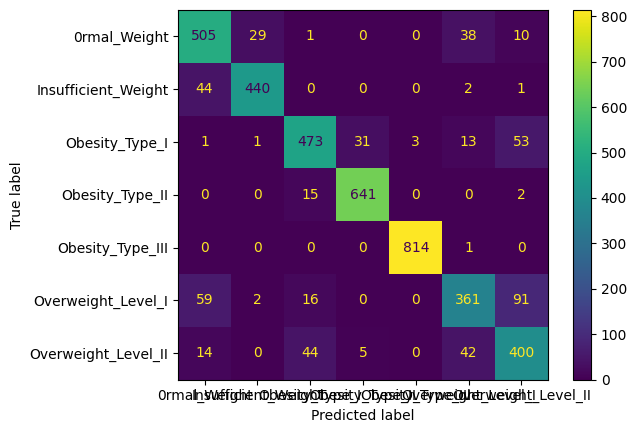

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Assuming 'EtC' is your fitted model and 'x_test', 'y_test' are your test data
y_pred = EtC.predict(x_test)
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=EtC.classes_)
disp.plot()
plt.show()

# **SVC**

In [ ]:
svc = SVC(random_state=50)  #SVC classification algorithm
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)
print(f"Test Accuracy: {accuracy_score(y_test, y_pred)}")

Test Accuracy: 0.7092967244701349


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, svc.predict(x_test)))

                     precision    recall  f1-score   support

       0rmal_Weight       0.63      0.58      0.60       583
Insufficient_Weight       0.75      0.87      0.81       487
     Obesity_Type_I       0.71      0.47      0.57       575
    Obesity_Type_II       0.90      0.72      0.80       658
   Obesity_Type_III       0.83      1.00      0.91       815
 Overweight_Level_I       0.66      0.45      0.53       529
Overweight_Level_II       0.48      0.75      0.59       505

           accuracy                           0.71      4152
          macro avg       0.71      0.69      0.69      4152
       weighted avg       0.72      0.71      0.70      4152



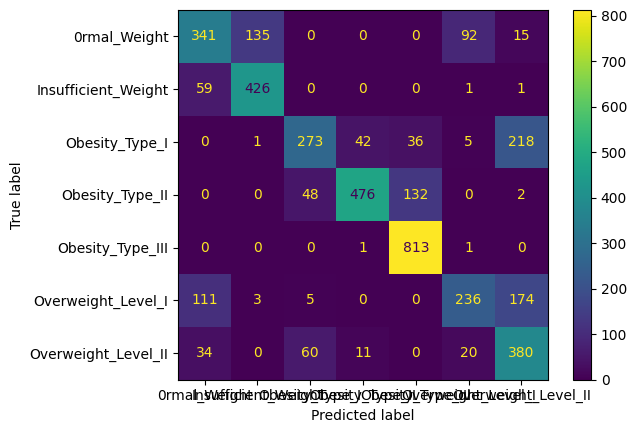

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Assuming 'svc' is your fitted model and 'x_test', 'y_test' are your test data
y_pred = svc.predict(x_test)
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svc.classes_)
disp.plot()
plt.show()

# **Boxplot**

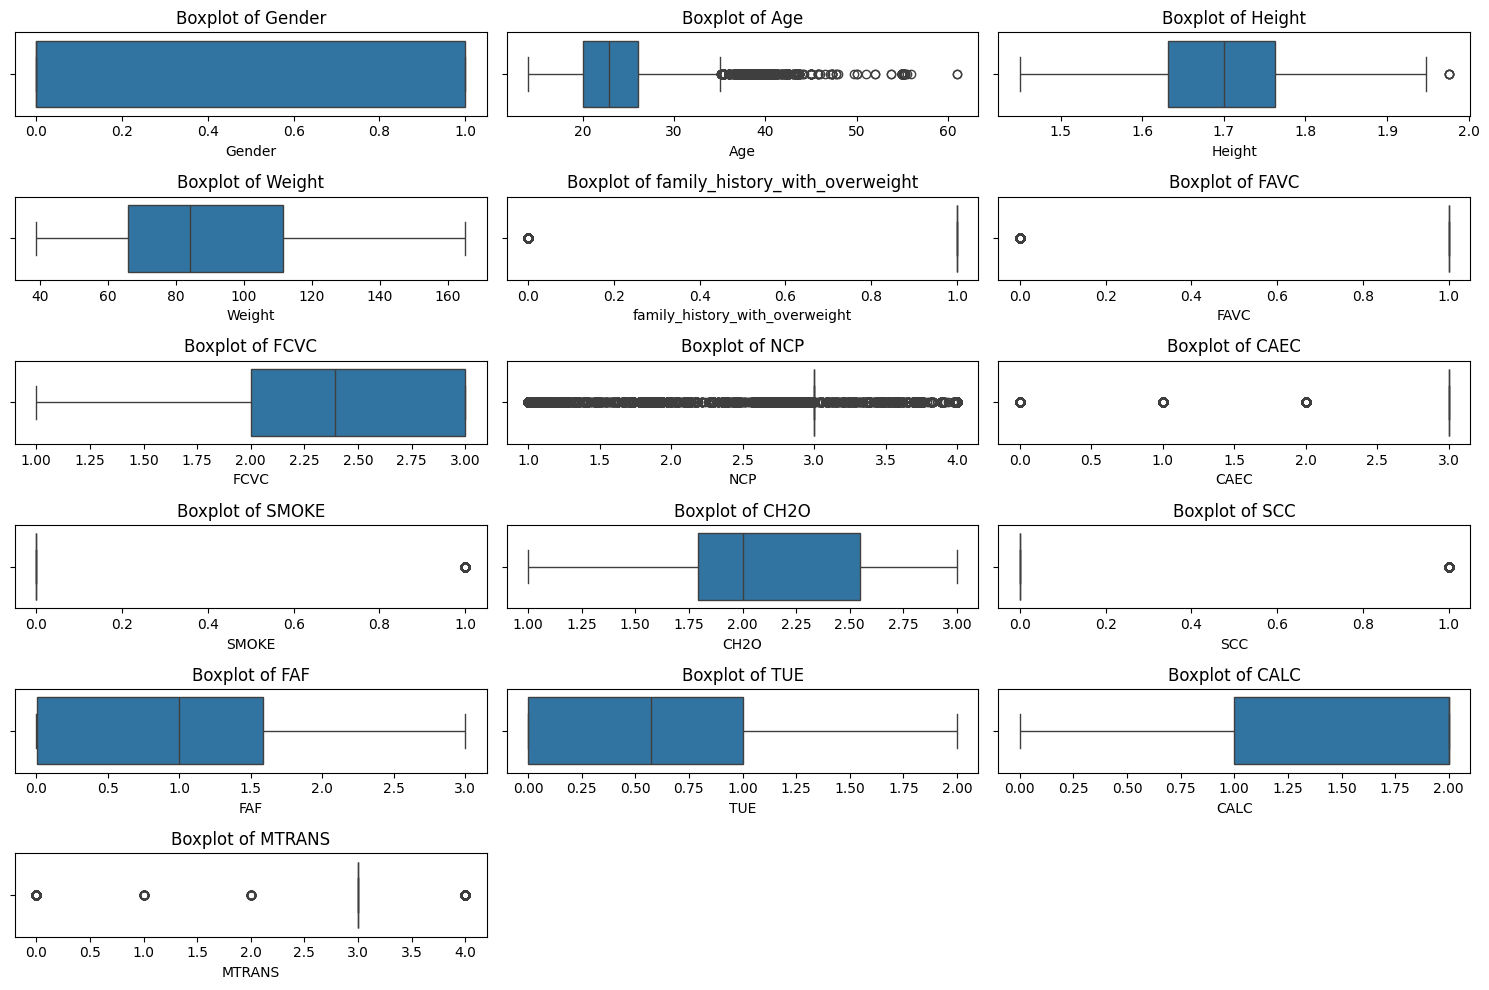

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create boxplots for each feature
plt.figure(figsize=(15, 10))

# Loop through each column in the dataset except the target variable
for i, col in enumerate(X.columns, 1):
    plt.subplot(len(X.columns) // 3 + 1, 3, i)  # Create subplots dynamically
    sns.boxplot(x=X[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

# **outliers**

In [ ]:
import numpy as np
import pandas as pd

# Define a function to detect outliers using the IQR method
def detect_outliers(df):
    outlier_columns = []
    for col in df.columns:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)

        # Calculate the IQR
        IQR = Q3 - Q1

        # Define the outlier range
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Check if there are any outliers in the column
        if ((df[col] < lower_bound) | (df[col] > upper_bound)).any():
            outlier_columns.append(col)

    return outlier_columns

# Detect which columns in X have outliers
columns_with_outliers = detect_outliers(X)

print("Columns with outliers:", columns_with_outliers)

Columns with outliers: ['Age', 'Height', 'family_history_with_overweight', 'FAVC', 'NCP', 'CAEC', 'SMOKE', 'SCC', 'MTRANS']


In [ ]:
import pandas as pd

# Function to count outliers using IQR
def count_outliers(df):
    outlier_counts = {}
    for col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        # Define the outlier range
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Count the number of outliers in the column
        outliers = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
        outlier_counts[col] = outliers

    # Convert the dictionary to a pandas DataFrame for better visualization
    outlier_counts_df = pd.DataFrame(list(outlier_counts.items()), columns=['Column', 'Outlier Count'])
    return outlier_counts_df.sort_values(by='Outlier Count', ascending=False)

# Get the outlier counts for each column
outlier_counts_df = count_outliers(X)

# Display the columns with the most outliers
print(outlier_counts_df)


                            Column  Outlier Count
7                              NCP           6052
15                          MTRANS           4071
4   family_history_with_overweight           3744
8                             CAEC           3229
5                             FAVC           1776
1                              Age           1074
11                             SCC            687
9                            SMOKE            245
2                           Height              4
0                           Gender              0
3                           Weight              0
6                             FCVC              0
10                            CH2O              0
12                             FAF              0
13                             TUE              0
14                            CALC              0


In [ ]:
# Function to cap outliers
def cap_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Cap outliers
        df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
        df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
    return df

# Cap outliers in X
X = cap_outliers(X, columns_with_outliers)


# **SMOTE**

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# # Dropping the target variable and splitting the data
# X = df.drop("RiskLevel", axis=1)
# y = df["RiskLevel"]

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

# Apply SMOTE to the training data
smote = SMOTE(random_state=1)
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

# Now you can continue with training your model using x_train_smote and y_train_smote


In [ ]:
from imblearn.over_sampling import RandomOverSampler

# Apply Random Oversampler to the training data
ros = RandomOverSampler(random_state=1)
x_train_smote, y_train_smote = ros.fit_resample(x_train, y_train)


In [ ]:
from imblearn.combine import SMOTETomek

# Apply SMOTETomek to the training data
smote_tomek = SMOTETomek(random_state=1)
x_train_smote, y_train_smote = smote_tomek.fit_resample(x_train, y_train)


In [ ]:
# Apply ADASYN to the training data
from imblearn.over_sampling import ADASYN
adasyn = ADASYN(random_state=1)
x_train_smote, y_train_smote = adasyn.fit_resample(x_train, y_train)

In [ ]:
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Apply Decision Tree classifier
dt_model = DecisionTreeClassifier(random_state=1)
dt_model.fit(x_train_smote, y_train_smote)

# Predict on test data
y_pred_dt = dt_model.predict(x_test)

# Evaluate Decision Tree
print("Decision Tree Classifier:")
print(classification_report(y_test, y_pred_dt))
print("Accuracy:", accuracy_score(y_test, y_pred_dt))

# Apply Random Forest classifier
rf_model = RandomForestClassifier(random_state=1)
rf_model.fit(x_train_smote, y_train_smote)

# Predict on test data
y_pred_rf = rf_model.predict(x_test)

# Evaluate Random Forest
print("\nRandom Forest Classifier:")
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))


Decision Tree Classifier:
                     precision    recall  f1-score   support

       0rmal_Weight       0.80      0.81      0.80       592
Insufficient_Weight       0.87      0.87      0.87       514
     Obesity_Type_I       0.78      0.76      0.77       591
    Obesity_Type_II       0.93      0.94      0.94       613
   Obesity_Type_III       1.00      1.00      1.00       870
 Overweight_Level_I       0.67      0.66      0.67       476
Overweight_Level_II       0.66      0.68      0.67       496

           accuracy                           0.84      4152
          macro avg       0.82      0.82      0.82      4152
       weighted avg       0.84      0.84      0.84      4152

Accuracy: 0.835019267822736

Random Forest Classifier:
                     precision    recall  f1-score   support

       0rmal_Weight       0.84      0.86      0.85       592
Insufficient_Weight       0.89      0.92      0.91       514
     Obesity_Type_I       0.88      0.87      0.87       591


## **Performance evaluation result without balancing.**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler  # For scaling the features

# Function to compute evaluation metrics
def evaluate_model(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    TP = cm[1, 1]
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]

    accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)
    precision = round(precision_score(y_test, y_pred, average='macro') * 100, 2)
    recall = round(recall_score(y_test, y_pred, average='macro') * 100, 2)
    f1 = round(f1_score(y_test, y_pred, average='macro') * 100, 2)
    specificity = round((TN / (TN + FP)) * 100, 2) if (TN + FP) != 0 else 0
    FPR = round((FP / (FP + TN)) * 100, 2) if (FP + TN) != 0 else 0
    FNR = round((FN / (FN + TP)) * 100, 2) if (FN + TP) != 0 else 0

    return [accuracy, recall, specificity, precision, f1, FPR, FNR]

# Load dataset
file_path = '/mnt/data/obesity_level.csv'
data = pd.read_csv('/content/obesity_level.csv')

# Select features and target
X = data.drop(columns=['id', '0be1dad'])  # Features (excluding 'id' and target)
y = data['0be1dad']  # Target variable (obesity level)

# Convert categorical features to numerical using Label Encoding
from sklearn.preprocessing import LabelEncoder
for col in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# Scale the features to improve Logistic Regression convergence
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=50)

# List of classifiers
classifiers = {
    'Decision Tree': DecisionTreeClassifier(random_state=50),
    'Logistic Regression': LogisticRegression(max_iter=500),  # Increase max_iter to avoid convergence issue
    'Naive Bayes': GaussianNB(),
    'Random Forest': RandomForestClassifier(random_state=50),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC()
}

# DataFrame to store performance metrics
results = pd.DataFrame(columns=['Algorithm', 'Accuracy (%)', 'Sensitivity (%)', 'Specificity (%)', 'Precision (%)', 'F1-score (%)', 'FPR (%)', 'FNR (%)'])

# Loop over classifiers, train and evaluate each model
for name, clf in classifiers.items():
    # Train the model
    clf.fit(x_train, y_train)

    # Make predictions
    y_pred = clf.predict(x_test)

    # Evaluate the model
    metrics = evaluate_model(y_test, y_pred)

    # Create a temporary DataFrame for this model's results
    temp_df = pd.DataFrame([[name] + metrics], columns=['Algorithm', 'Accuracy (%)', 'Sensitivity (%)', 'Specificity (%)', 'Precision (%)', 'F1-score (%)', 'FPR (%)', 'FNR (%)'])

    # Concatenate the temp_df to the results DataFrame
    results = pd.concat([results, temp_df], ignore_index=True)

# Display the results
print("Performance Evaluation Results:")
print(results.to_string(index=False, float_format='%.2f'))

<ipython-input-28-036c7c7e2a13>:79: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, temp_df], ignore_index=True)


Performance Evaluation Results:
             Algorithm  Accuracy (%)  Sensitivity (%)  Specificity (%)  Precision (%)  F1-score (%)  FPR (%)  FNR (%)
         Decision Tree         84.27            82.91            88.64          82.85         82.87    11.36     9.17
   Logistic Regression         86.08            84.84            87.93          84.66         84.69    12.07     5.35
           Naive Bayes         65.20            62.03            58.27          63.92         60.40    41.73     4.05
         Random Forest         89.69            88.69            94.67          88.78         88.68     5.33     6.60
   K-Nearest Neighbors         75.07            72.59            85.06          72.96         72.55    14.94    22.22
Support Vector Machine         85.65            84.27            91.23          84.35         84.28     8.77    10.97


<ipython-input-29-6c5052ae7c8a>:89: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, temp_df], ignore_index=True)


Performance Evaluation Results:
             Algorithm  Accuracy (%)  Sensitivity (%)  Specificity (%)  Precision (%)  F1-score (%)  FPR (%)  FNR (%)
         Decision Tree         84.27            82.91            88.64          82.85         82.87    11.36     9.17
   Logistic Regression         86.08            84.84            87.93          84.66         84.69    12.07     5.35
           Naive Bayes         65.20            62.03            58.27          63.92         60.40    41.73     4.05
         Random Forest         89.69            88.69            94.67          88.78         88.68     5.33     6.60
   K-Nearest Neighbors         75.07            72.59            85.06          72.96         72.55    14.94    22.22
Support Vector Machine         85.65            84.27            91.23          84.35         84.28     8.77    10.97


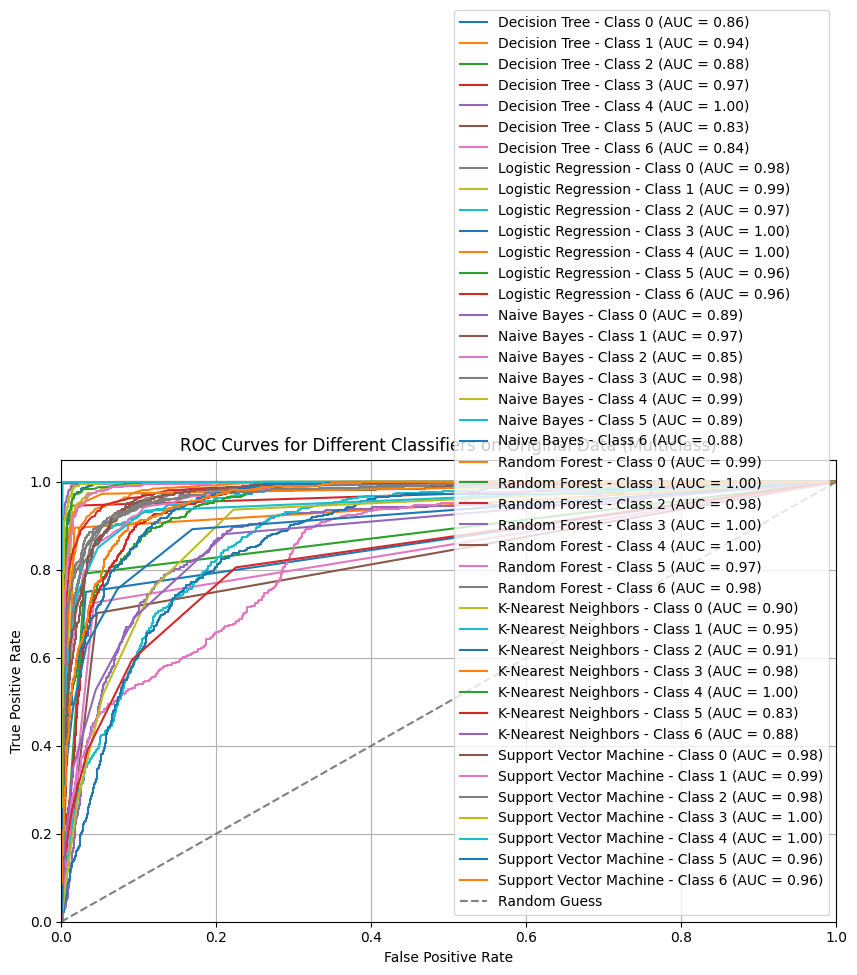

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score,
                             recall_score, f1_score, roc_curve, auc)
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.preprocessing import label_binarize

# Function to compute evaluation metrics
def evaluate_model(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    TP = cm[1, 1]
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]

    accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)
    precision = round(precision_score(y_test, y_pred, average='macro') * 100, 2)
    recall = round(recall_score(y_test, y_pred, average='macro') * 100, 2)
    f1 = round(f1_score(y_test, y_pred, average='macro') * 100, 2)
    specificity = round((TN / (TN + FP)) * 100, 2) if (TN + FP) != 0 else 0
    FPR = round((FP / (FP + TN)) * 100, 2) if (FP + TN) != 0 else 0
    FNR = round((FN / (FN + TP)) * 100, 2) if (FN + TP) != 0 else 0

    return [accuracy, recall, specificity, precision, f1, FPR, FNR]

# Load dataset
file_path = '/mnt/data/obesity_level.csv'
data = pd.read_csv('/content/obesity_level.csv')

# Select features and target
X = data.drop(columns=['id', '0be1dad'])  # Features (excluding 'id' and target)
y = data['0be1dad']  # Target variable (obesity level)

# Convert categorical features to numerical using Label Encoding
for col in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# Scale the features to improve model convergence
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=50)

# Binarize the output for multiclass ROC
y_test_bin = label_binarize(y_test, classes=np.unique(y))
n_classes = y_test_bin.shape[1]

# List of classifiers
classifiers = {
    'Decision Tree': DecisionTreeClassifier(random_state=50),
    'Logistic Regression': LogisticRegression(max_iter=500),
    'Naive Bayes': GaussianNB(),
    'Random Forest': RandomForestClassifier(random_state=50),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(probability=True, random_state=50)
}

# DataFrame to store performance metrics
results = pd.DataFrame(columns=['Algorithm', 'Accuracy (%)', 'Sensitivity (%)', 'Specificity (%)', 'Precision (%)', 'F1-score (%)', 'FPR (%)', 'FNR (%)'])

# Create a figure for the ROC curves
plt.figure(figsize=(10, 6))

# Loop over classifiers, train and evaluate each model
for name, clf in classifiers.items():
    # Train the model
    clf.fit(x_train, y_train)

    # Make predictions
    y_pred = clf.predict(x_test)

    # Evaluate the model
    metrics = evaluate_model(y_test, y_pred)

    # Create a temporary DataFrame for this model's results
    temp_df = pd.DataFrame([[name] + metrics], columns=['Algorithm', 'Accuracy (%)', 'Sensitivity (%)', 'Specificity (%)', 'Precision (%)', 'F1-score (%)', 'FPR (%)', 'FNR (%)'])

    # Concatenate the temp_df to the results DataFrame
    results = pd.concat([results, temp_df], ignore_index=True)

    # Calculate ROC curve for each class
    y_scores = clf.predict_proba(x_test)  # Get probability estimates
    for i in range(n_classes):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_scores[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{name} - Class {i} (AUC = {roc_auc:.2f})')

# Display the results
print("Performance Evaluation Results:")
print(results.to_string(index=False, float_format='%.2f'))

# Plot the diagonal line (random guessing)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')

# Customize the plot
plt.title('ROC Curves for Different Classifiers on Original Data (Multiclass)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.legend(loc='lower right')
plt.grid()
plt.show()

**Performance evaluation result after data balancing using SMOTE.**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler  # For scaling the features
from imblearn.over_sampling import SMOTE  # Import SMOTE

# Function to compute evaluation metrics
def evaluate_model(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    TP = cm[1, 1]
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]

    accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)
    precision = round(precision_score(y_test, y_pred, average='macro') * 100, 2)
    recall = round(recall_score(y_test, y_pred, average='macro') * 100, 2)
    f1 = round(f1_score(y_test, y_pred, average='macro') * 100, 2)
    specificity = round((TN / (TN + FP)) * 100, 2) if (TN + FP) != 0 else 0
    FPR = round((FP / (FP + TN)) * 100, 2) if (FP + TN) != 0 else 0
    FNR = round((FN / (FN + TP)) * 100, 2) if (FN + TP) != 0 else 0

    return [accuracy, recall, specificity, precision, f1, FPR, FNR]

# Load dataset
file_path = '/mnt/data/obesity_level.csv'
data = pd.read_csv('/content/obesity_level.csv')

# Select features and target
X = data.drop(columns=['id', '0be1dad'])  # Features (excluding 'id' and target)
y = data['0be1dad']  # Target variable (obesity level)

# Convert categorical features to numerical using Label Encoding
from sklearn.preprocessing import LabelEncoder
for col in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# Scale the features to improve Logistic Regression convergence
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=50)

# Apply SMOTE to balance the training data
smote = SMOTE(random_state=50)
x_train_balanced, y_train_balanced = smote.fit_resample(x_train, y_train)

# List of classifiers
classifiers = {
    'Decision Tree': DecisionTreeClassifier(random_state=50),
    'Logistic Regression': LogisticRegression(max_iter=500),  # Increase max_iter to avoid convergence issue
    'Naive Bayes': GaussianNB(),
    'Random Forest': RandomForestClassifier(random_state=50),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC()
}

# DataFrame to store performance metrics
results = pd.DataFrame(columns=['Algorithm', 'Accuracy (%)', 'Sensitivity (%)', 'Specificity (%)', 'Precision (%)', 'F1-score (%)', 'FPR (%)', 'FNR (%)'])

# Loop over classifiers, train and evaluate each model
for name, clf in classifiers.items():
    # Train the model with balanced data
    clf.fit(x_train_balanced, y_train_balanced)

    # Make predictions
    y_pred = clf.predict(x_test)

    # Evaluate the model
    metrics = evaluate_model(y_test, y_pred)

    # Create a temporary DataFrame for this model's results
    temp_df = pd.DataFrame([[name] + metrics], columns=['Algorithm', 'Accuracy (%)', 'Sensitivity (%)', 'Specificity (%)', 'Precision (%)', 'F1-score (%)', 'FPR (%)', 'FNR (%)'])

    # Concatenate the temp_df to the results DataFrame
    results = pd.concat([results, temp_df], ignore_index=True)

# Display the results
print("Performance Evaluation Results after SMOTE Balancing:")
print(results.to_string(index=False, float_format='%.2f'))

<ipython-input-30-c93b40c2ddce>:84: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, temp_df], ignore_index=True)


Performance Evaluation Results after SMOTE Balancing:
             Algorithm  Accuracy (%)  Sensitivity (%)  Specificity (%)  Precision (%)  F1-score (%)  FPR (%)  FNR (%)
         Decision Tree         83.24            81.75            88.35          81.76         81.75    11.65    12.08
   Logistic Regression         85.86            84.68            86.22          84.53         84.50    13.78     4.54
           Naive Bayes         65.51            62.39            58.66          64.14         60.87    41.34     4.28
         Random Forest         89.74            88.79            94.06          88.81         88.76     5.94     5.77
   K-Nearest Neighbors         74.33            71.98            79.26          71.82         71.87    20.74    17.87
Support Vector Machine         85.93            84.65            89.33          84.65         84.62    10.67    10.35


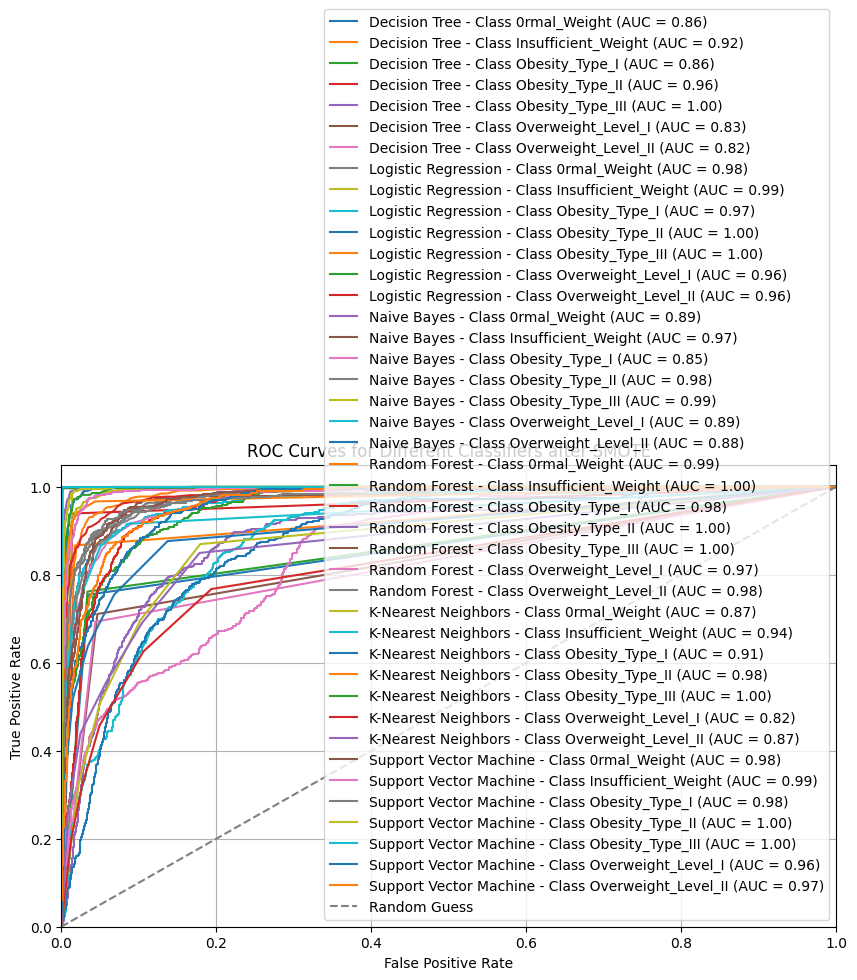

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.preprocessing import StandardScaler, label_binarize
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# Function to compute evaluation metrics
def evaluate_model(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    TP = cm[1, 1]
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]

    accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)
    precision = round(precision_score(y_test, y_pred, average='macro') * 100, 2)
    recall = round(recall_score(y_test, y_pred, average='macro') * 100, 2)
    f1 = round(f1_score(y_test, y_pred, average='macro') * 100, 2)
    specificity = round((TN / (TN + FP)) * 100, 2) if (TN + FP) != 0 else 0
    FPR = round((FP / (FP + TN)) * 100, 2) if (FP + TN) != 0 else 0
    FNR = round((FN / (FN + TP)) * 100, 2) if (FN + TP) != 0 else 0

    return [accuracy, recall, specificity, precision, f1, FPR, FNR]

# Load dataset
file_path = '/mnt/data/obesity_level.csv'
data = pd.read_csv('/content/obesity_level.csv')

# Select features and target
X = data.drop(columns=['id', '0be1dad'])  # Features (excluding 'id' and target)
y = data['0be1dad']  # Target variable (obesity level)

# Convert categorical features to numerical using Label Encoding
from sklearn.preprocessing import LabelEncoder
for col in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# Scale the features to improve model convergence
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=50)

# Apply SMOTE to balance the training data
smote = SMOTE(random_state=50)
x_train_balanced, y_train_balanced = smote.fit_resample(x_train, y_train)

# List of classifiers
classifiers = {
    'Decision Tree': DecisionTreeClassifier(random_state=50),
    'Logistic Regression': LogisticRegression(max_iter=500),
    'Naive Bayes': GaussianNB(),
    'Random Forest': RandomForestClassifier(random_state=50),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(probability=True, random_state=50)  # Set probability=True for SVC
}

# Binarize the output
classes = np.unique(y)
n_classes = len(classes)
y_test_bin = label_binarize(y_test, classes=classes)

# Create a figure for the ROC curves
plt.figure(figsize=(10, 6))

# Loop over classifiers to calculate and plot ROC curves
for name, clf in classifiers.items():
    # Train the model with balanced data
    clf.fit(x_train_balanced, y_train_balanced)

    # Get the probability estimates for all classes
    y_scores = clf.predict_proba(x_test)

    # Calculate ROC curve for each class
    for i in range(n_classes):
        # Ensure that the classifier provides probabilities for the class
        if y_scores.shape[1] > i:  # Check if the class index exists
            fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_scores[:, i])

            # Calculate AUC
            roc_auc = auc(fpr, tpr)

            # Plot ROC curve
            plt.plot(fpr, tpr, label=f'{name} - Class {classes[i]} (AUC = {roc_auc:.2f})')

# Plot the diagonal line (random guessing)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')

# Customize the plot
plt.title('ROC Curves for Different Classifiers after SMOTE')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.legend(loc='lower right')
plt.grid()
plt.show()

**Performance evaluation result after data balancing using ADASYN.**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler  # For scaling the features
from imblearn.over_sampling import ADASYN  # Import ADASYN

# Function to compute evaluation metrics
def evaluate_model(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    TP = cm[1, 1]
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]

    accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)
    precision = round(precision_score(y_test, y_pred, average='macro') * 100, 2)
    recall = round(recall_score(y_test, y_pred, average='macro') * 100, 2)
    f1 = round(f1_score(y_test, y_pred, average='macro') * 100, 2)
    specificity = round((TN / (TN + FP)) * 100, 2) if (TN + FP) != 0 else 0
    FPR = round((FP / (FP + TN)) * 100, 2) if (FP + TN) != 0 else 0
    FNR = round((FN / (FN + TP)) * 100, 2) if (FN + TP) != 0 else 0

    return [accuracy, recall, specificity, precision, f1, FPR, FNR]

# Load dataset
file_path = '/mnt/data/obesity_level.csv'
data = pd.read_csv('/content/obesity_level.csv')

# Select features and target
X = data.drop(columns=['id', '0be1dad'])  # Features (excluding 'id' and target)
y = data['0be1dad']  # Target variable (obesity level)

# Convert categorical features to numerical using Label Encoding
from sklearn.preprocessing import LabelEncoder
for col in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# Scale the features to improve Logistic Regression convergence
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=50)

# Apply ADASYN to balance the training data
adasyn = ADASYN(random_state=50)
x_train_balanced, y_train_balanced = adasyn.fit_resample(x_train, y_train)

# List of classifiers
classifiers = {
    'Decision Tree': DecisionTreeClassifier(random_state=50),
    'Logistic Regression': LogisticRegression(max_iter=500),  # Increase max_iter to avoid convergence issue
    'Naive Bayes': GaussianNB(),
    'Random Forest': RandomForestClassifier(random_state=50),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC()
}

# DataFrame to store performance metrics
results = pd.DataFrame(columns=['Algorithm', 'Accuracy (%)', 'Sensitivity (%)', 'Specificity (%)', 'Precision (%)', 'F1-score (%)', 'FPR (%)', 'FNR (%)'])

# Loop over classifiers, train and evaluate each model
for name, clf in classifiers.items():
    # Train the model with balanced data
    clf.fit(x_train_balanced, y_train_balanced)

    # Make predictions
    y_pred = clf.predict(x_test)

    # Evaluate the model
    metrics = evaluate_model(y_test, y_pred)

    # Create a temporary DataFrame for this model's results
    temp_df = pd.DataFrame([[name] + metrics], columns=['Algorithm', 'Accuracy (%)', 'Sensitivity (%)', 'Specificity (%)', 'Precision (%)', 'F1-score (%)', 'FPR (%)', 'FNR (%)'])

    # Concatenate the temp_df to the results DataFrame
    results = pd.concat([results, temp_df], ignore_index=True)

# Display the results
print("Performance Evaluation Results after ADASYN Balancing:")
print(results.to_string(index=False, float_format='%.2f'))

<ipython-input-32-863537f3ea76>:84: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, temp_df], ignore_index=True)


Performance Evaluation Results after ADASYN Balancing:
             Algorithm  Accuracy (%)  Sensitivity (%)  Specificity (%)  Precision (%)  F1-score (%)  FPR (%)  FNR (%)
         Decision Tree         83.89            82.41            89.36          82.38         82.38    10.64    11.02
   Logistic Regression         85.43            84.21            83.03          84.09         83.96    16.97     4.33
           Naive Bayes         65.03            61.82            53.94          62.54         59.78    46.06     3.13
         Random Forest         89.38            88.40            92.76          88.37         88.35     7.24     5.37
   K-Nearest Neighbors         73.60            71.30            68.72          70.51         70.71    31.28    14.10
Support Vector Machine         85.89            84.66            87.53          84.56         84.54    12.47     6.82


<ipython-input-33-c2f4c6cb3246>:86: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, temp_df], ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true

Performance Evaluation Results after ADASYN Balancing:
             Algorithm  Accuracy (%)  Sensitivity (%)  Specificity (%)  Precision (%)  F1-score (%)  FPR (%)  FNR (%)
         Decision Tree         83.89            82.41            89.36          82.38         82.38    10.64    11.02
   Logistic Regression         74.25            72.19            67.78          71.41         71.16    32.22     2.29
           Naive Bayes         65.03            61.82            53.94          62.54         59.78    46.06     3.13
         Random Forest         89.38            88.40            92.76          88.37         88.35     7.24     5.37
   K-Nearest Neighbors         73.60            71.30            68.72          70.51         70.71    31.28    14.10
Support Vector Machine         85.89            84.66            87.53          84.56         84.54    12.47     6.82


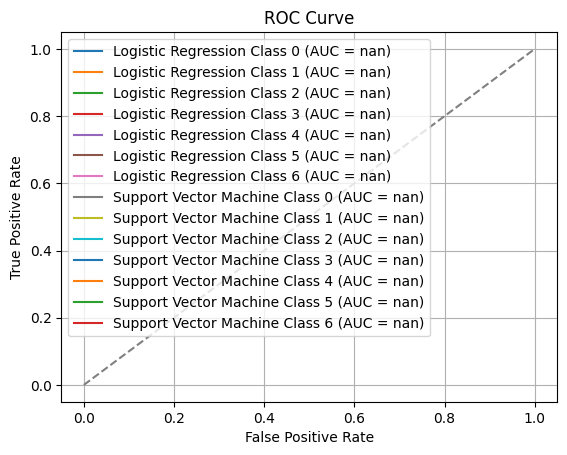

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score,
                             recall_score, f1_score, roc_curve, auc)
from sklearn.preprocessing import StandardScaler  # For scaling the features
from imblearn.over_sampling import ADASYN  # Import ADASYN
import matplotlib.pyplot as plt  # For plotting

# Function to compute evaluation metrics
def evaluate_model(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    TP = cm[1, 1]
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]

    accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)
    precision = round(precision_score(y_test, y_pred, average='macro') * 100, 2)
    recall = round(recall_score(y_test, y_pred, average='macro') * 100, 2)
    f1 = round(f1_score(y_test, y_pred, average='macro') * 100, 2)
    specificity = round((TN / (TN + FP)) * 100, 2) if (TN + FP) != 0 else 0
    FPR = round((FP / (FP + TN)) * 100, 2) if (FP + TN) != 0 else 0
    FNR = round((FN / (FN + TP)) * 100, 2) if (FN + TP) != 0 else 0

    return [accuracy, recall, specificity, precision, f1, FPR, FNR]

# Load dataset
file_path = '/mnt/data/obesity_level.csv'
data = pd.read_csv('/content/obesity_level.csv')

# Select features and target
X = data.drop(columns=['id', '0be1dad'])  # Features (excluding 'id' and target)
y = data['0be1dad']  # Target variable (obesity level)

# Convert categorical features to numerical using Label Encoding
from sklearn.preprocessing import LabelEncoder
for col in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# Scale the features to improve Logistic Regression convergence
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=50)

# Apply ADASYN to balance the training data
adasyn = ADASYN(random_state=50)
x_train_balanced, y_train_balanced = adasyn.fit_resample(x_train, y_train)

# List of classifiers
classifiers = {
    'Decision Tree': DecisionTreeClassifier(random_state=50),
    'Logistic Regression': LogisticRegression(max_iter=500, multi_class='ovr'),
    'Naive Bayes': GaussianNB(),
    'Random Forest': RandomForestClassifier(random_state=50),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(probability=True)  # Enable probability estimates
}

# DataFrame to store performance metrics
results = pd.DataFrame(columns=['Algorithm', 'Accuracy (%)', 'Sensitivity (%)', 'Specificity (%)', 'Precision (%)', 'F1-score (%)', 'FPR (%)', 'FNR (%)'])

# Loop over classifiers, train and evaluate each model
for name, clf in classifiers.items():
    # Train the model with balanced data
    clf.fit(x_train_balanced, y_train_balanced)

    # Make predictions
    y_pred = clf.predict(x_test)

    # Evaluate the model
    metrics = evaluate_model(y_test, y_pred)

    # Create a temporary DataFrame for this model's results
    temp_df = pd.DataFrame([[name] + metrics], columns=['Algorithm', 'Accuracy (%)', 'Sensitivity (%)', 'Specificity (%)', 'Precision (%)', 'F1-score (%)', 'FPR (%)', 'FNR (%)'])

    # Concatenate the temp_df to the results DataFrame
    results = pd.concat([results, temp_df], ignore_index=True)

    # Calculate ROC curve and AUC for each class
    if name in ['Logistic Regression', 'Support Vector Machine']:
        # Get the probability estimates
        y_scores = clf.predict_proba(x_test)

        # Calculate ROC curve and AUC for each class
        for i in range(len(set(y))):  # Assuming classes are labeled as 0, 1, 2, etc.
            fpr, tpr, thresholds = roc_curve(y_test == i, y_scores[:, i])  # Treat class i as positive
            roc_auc = auc(fpr, tpr)

            # Plot ROC curve
            plt.plot(fpr, tpr, label=f'{name} Class {i} (AUC = {roc_auc:.2f})')

# Display the results
print("Performance Evaluation Results after ADASYN Balancing:")
print(results.to_string(index=False, float_format='%.2f'))

# Show ROC curve
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score

# Load the dataset
df = pd.read_csv('/content/obesity_level.csv')

# Rename target column for clarity
df = df.rename(columns={'0be1dad': 'obesity_level'})

# Encode target variable 'obesity_level'
le = LabelEncoder()
df['obesity_level'] = le.fit_transform(df['obesity_level'])

# Identify categorical columns, excluding the target if present
categorical_cols = df.select_dtypes(include=['object']).columns
if 'obesity_level' in categorical_cols:
    categorical_cols = categorical_cols.drop('obesity_level')

# One-hot encode categorical features, if any
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Split dataset into features and target
X = df.drop('obesity_level', axis=1)
y = df['obesity_level']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Feature selection using ANOVA (F-test)
anova_selector = SelectKBest(f_classif, k=5)
X_train_anova = anova_selector.fit_transform(X_train, y_train)
X_test_anova = anova_selector.transform(X_test)

# Feature selection using Chi-Square
chi2_selector = SelectKBest(chi2, k=5)
X_train_chi2 = chi2_selector.fit_transform(X_train, y_train)
X_test_chi2 = chi2_selector.transform(X_test)

# Feature selection using Recursive Feature Elimination (RFE) with RandomForestClassifier
rfe_selector = RFE(estimator=RandomForestClassifier(), n_features_to_select=5)
X_train_rfe = rfe_selector.fit_transform(X_train, y_train)
X_test_rfe = rfe_selector.transform(X_test)

# Train and evaluate models using Random Forest and Decision Tree with the selected features

# 1. Random Forest with ANOVA-selected features
rf_anova = RandomForestClassifier()
rf_anova.fit(X_train_anova, y_train)
y_pred_rf_anova = rf_anova.predict(X_test_anova)
accuracy_rf_anova = accuracy_score(y_test, y_pred_rf_anova)

# 2. Decision Tree with ANOVA-selected features
dt_anova = DecisionTreeClassifier()
dt_anova.fit(X_train_anova, y_train)
y_pred_dt_anova = dt_anova.predict(X_test_anova)
accuracy_dt_anova = accuracy_score(y_test, y_pred_dt_anova)

# 3. Random Forest with Chi-Square-selected features
rf_chi2 = RandomForestClassifier()
rf_chi2.fit(X_train_chi2, y_train)
y_pred_rf_chi2 = rf_chi2.predict(X_test_chi2)
accuracy_rf_chi2 = accuracy_score(y_test, y_pred_rf_chi2)

# 4. Decision Tree with Chi-Square-selected features
dt_chi2 = DecisionTreeClassifier()
dt_chi2.fit(X_train_chi2, y_train)
y_pred_dt_chi2 = dt_chi2.predict(X_test_chi2)
accuracy_dt_chi2 = accuracy_score(y_test, y_pred_dt_chi2)

# 5. Random Forest with RFE-selected features
rf_rfe = RandomForestClassifier()
rf_rfe.fit(X_train_rfe, y_train)
y_pred_rf_rfe = rf_rfe.predict(X_test_rfe)
accuracy_rf_rfe = accuracy_score(y_test, y_pred_rf_rfe)

# 6. Decision Tree with RFE-selected features
dt_rfe = DecisionTreeClassifier()
dt_rfe.fit(X_train_rfe, y_train)
y_pred_dt_rfe = dt_rfe.predict(X_test_rfe)
accuracy_dt_rfe = accuracy_score(y_test, y_pred_dt_rfe)

# Store results in a dataframe for comparison
results = pd.DataFrame({
    'Model': ['Random Forest (ANOVA)', 'Decision Tree (ANOVA)',
              'Random Forest (Chi-Square)', 'Decision Tree (Chi-Square)',
              'Random Forest (RFE)', 'Decision Tree (RFE)'],
    'Accuracy': [accuracy_rf_anova, accuracy_dt_anova,
                 accuracy_rf_chi2, accuracy_dt_chi2,
                 accuracy_rf_rfe, accuracy_dt_rfe]
})

# Display the results
print(results)

# Get the selected features from each feature selection method and display them

# Get feature names
feature_names = X.columns

# ANOVA selected features
anova_selected_features = feature_names[anova_selector.get_support()]
anova_selected_features_list = list(anova_selected_features)

# Chi-Square selected features
chi2_selected_features = feature_names[chi2_selector.get_support()]
chi2_selected_features_list = list(chi2_selected_features)

# RFE selected features
rfe_selected_features = feature_names[rfe_selector.get_support()]
rfe_selected_features_list = list(rfe_selected_features)

# Create a dataframe to display the selected features for each method
selected_features_df = pd.DataFrame({
    'ANOVA': anova_selected_features_list,
    'Chi-Square': chi2_selected_features_list,
    'RFE': rfe_selected_features_list
})

# Display the dataframe
print(selected_features_df)


                        Model  Accuracy
0       Random Forest (ANOVA)  0.817805
1       Decision Tree (ANOVA)  0.808556
2  Random Forest (Chi-Square)  0.825031
3  Decision Tree (Chi-Square)  0.785432
4         Random Forest (RFE)  0.872820
5         Decision Tree (RFE)  0.837171
                            ANOVA       Chi-Square          RFE
0                          Weight               id          Age
1  family_history_with_overweight              Age       Height
2                            FCVC           Weight       Weight
3                     Gender_Male      Gender_Male         FCVC
4                 CAEC_Frequently  CAEC_Frequently  Gender_Male


# **Feature_selection**



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score

# Load the dataset
df = pd.read_csv('/content/obesity_level.csv')

# Rename target column for clarity
df = df.rename(columns={'0be1dad': 'obesity_level'})

# Encode target variable 'obesity_level'
le = LabelEncoder()
df['obesity_level'] = le.fit_transform(df['obesity_level'])

# Identify categorical columns, excluding the target if present
categorical_cols = df.select_dtypes(include=['object']).columns
if 'obesity_level' in categorical_cols:
    categorical_cols = categorical_cols.drop('obesity_level')

# One-hot encode categorical features, if any
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Split dataset into features and target
X = df.drop('obesity_level', axis=1)
y = df['obesity_level']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Feature selection using ANOVA (F-test)
anova_selector = SelectKBest(f_classif, k=5)
X_train_anova = anova_selector.fit_transform(X_train, y_train)
X_test_anova = anova_selector.transform(X_test)

# Feature selection using Chi-Square
chi2_selector = SelectKBest(chi2, k=5)
X_train_chi2 = chi2_selector.fit_transform(X_train, y_train)
X_test_chi2 = chi2_selector.transform(X_test)

# Feature selection using Recursive Feature Elimination (RFE) with RandomForestClassifier
rfe_selector = RFE(estimator=RandomForestClassifier(), n_features_to_select=5)
X_train_rfe = rfe_selector.fit_transform(X_train, y_train)
X_test_rfe = rfe_selector.transform(X_test)

# Train and evaluate models using Random Forest and Decision Tree with the selected features

# 1. Random Forest with ANOVA-selected features
rf_anova = RandomForestClassifier()
rf_anova.fit(X_train_anova, y_train)
y_pred_rf_anova = rf_anova.predict(X_test_anova)
accuracy_rf_anova = accuracy_score(y_test, y_pred_rf_anova)

# 2. Decision Tree with ANOVA-selected features
dt_anova = DecisionTreeClassifier()
dt_anova.fit(X_train_anova, y_train)
y_pred_dt_anova = dt_anova.predict(X_test_anova)
accuracy_dt_anova = accuracy_score(y_test, y_pred_dt_anova)

# 3. Random Forest with Chi-Square-selected features
rf_chi2 = RandomForestClassifier()
rf_chi2.fit(X_train_chi2, y_train)
y_pred_rf_chi2 = rf_chi2.predict(X_test_chi2)
accuracy_rf_chi2 = accuracy_score(y_test, y_pred_rf_chi2)

# 4. Decision Tree with Chi-Square-selected features
dt_chi2 = DecisionTreeClassifier()
dt_chi2.fit(X_train_chi2, y_train)
y_pred_dt_chi2 = dt_chi2.predict(X_test_chi2)
accuracy_dt_chi2 = accuracy_score(y_test, y_pred_dt_chi2)

# 5. Random Forest with RFE-selected features
rf_rfe = RandomForestClassifier()
rf_rfe.fit(X_train_rfe, y_train)
y_pred_rf_rfe = rf_rfe.predict(X_test_rfe)
accuracy_rf_rfe = accuracy_score(y_test, y_pred_rf_rfe)

# 6. Decision Tree with RFE-selected features
dt_rfe = DecisionTreeClassifier()
dt_rfe.fit(X_train_rfe, y_train)
y_pred_dt_rfe = dt_rfe.predict(X_test_rfe)
accuracy_dt_rfe = accuracy_score(y_test, y_pred_dt_rfe)

# Store results in a dataframe for comparison
results = pd.DataFrame({
    'Model': ['Random Forest (ANOVA)', 'Decision Tree (ANOVA)',
              'Random Forest (Chi-Square)', 'Decision Tree (Chi-Square)',
              'Random Forest (RFE)', 'Decision Tree (RFE)'],
    'Accuracy': [accuracy_rf_anova, accuracy_dt_anova,
                 accuracy_rf_chi2, accuracy_dt_chi2,
                 accuracy_rf_rfe, accuracy_dt_rfe]
})

# Display the results
print(results)

# Get the selected features from each feature selection method and display them

# Get feature names
feature_names = X.columns

# ANOVA selected features
anova_selected_features = feature_names[anova_selector.get_support()]
anova_selected_features_list = list(anova_selected_features)

# Chi-Square selected features
chi2_selected_features = feature_names[chi2_selector.get_support()]
chi2_selected_features_list = list(chi2_selected_features)

# RFE selected features
rfe_selected_features = feature_names[rfe_selector.get_support()]
rfe_selected_features_list = list(rfe_selected_features)

# Create a dataframe to display the selected features for each method
selected_features_df = pd.DataFrame({
    'ANOVA': anova_selected_features_list,
    'Chi-Square': chi2_selected_features_list,
    'RFE': rfe_selected_features_list
})

# Display the dataframe
print(selected_features_df)


                        Model  Accuracy
0       Random Forest (ANOVA)  0.818191
1       Decision Tree (ANOVA)  0.808363
2  Random Forest (Chi-Square)  0.825320
3  Decision Tree (Chi-Square)  0.783312
4         Random Forest (RFE)  0.871953
5         Decision Tree (RFE)  0.819154
                            ANOVA       Chi-Square     RFE
0                          Weight               id      id
1  family_history_with_overweight              Age     Age
2                            FCVC           Weight  Height
3                     Gender_Male      Gender_Male  Weight
4                 CAEC_Frequently  CAEC_Frequently    FCVC


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score

# Load the dataset
df = pd.read_csv('/content/obesity_level.csv')

# Rename target column for clarity
df = df.rename(columns={'0be1dad': 'obesity_level'})

# Encode target variable 'obesity_level'
le = LabelEncoder()
df['obesity_level'] = le.fit_transform(df['obesity_level'])

# Identify categorical columns, excluding the target if present
categorical_cols = df.select_dtypes(include=['object']).columns
if 'obesity_level' in categorical_cols:
    categorical_cols = categorical_cols.drop('obesity_level')

# One-hot encode categorical features, if any
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Split dataset into features and target
X = df.drop('obesity_level', axis=1)
y = df['obesity_level']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Set the value of k
k = 10  # Set k to 10 to select a different number of features

# Feature selection using ANOVA (F-test)
anova_selector = SelectKBest(f_classif, k=k)
X_train_anova = anova_selector.fit_transform(X_train, y_train)
X_test_anova = anova_selector.transform(X_test)

# Feature selection using Chi-Square
chi2_selector = SelectKBest(chi2, k=k)
X_train_chi2 = chi2_selector.fit_transform(X_train, y_train)
X_test_chi2 = chi2_selector.transform(X_test)

# Feature selection using Recursive Feature Elimination (RFE) with RandomForestClassifier
rfe_selector = RFE(estimator=RandomForestClassifier(), n_features_to_select=k)
X_train_rfe = rfe_selector.fit_transform(X_train, y_train)
X_test_rfe = rfe_selector.transform(X_test)

# Train and evaluate models using Random Forest and Decision Tree with the selected features

# 1. Random Forest with ANOVA-selected features
rf_anova = RandomForestClassifier()
rf_anova.fit(X_train_anova, y_train)
y_pred_rf_anova = rf_anova.predict(X_test_anova)
accuracy_rf_anova = accuracy_score(y_test, y_pred_rf_anova)

# 2. Decision Tree with ANOVA-selected features
dt_anova = DecisionTreeClassifier()
dt_anova.fit(X_train_anova, y_train)
y_pred_dt_anova = dt_anova.predict(X_test_anova)
accuracy_dt_anova = accuracy_score(y_test, y_pred_dt_anova)

# 3. Random Forest with Chi-Square-selected features
rf_chi2 = RandomForestClassifier()
rf_chi2.fit(X_train_chi2, y_train)
y_pred_rf_chi2 = rf_chi2.predict(X_test_chi2)
accuracy_rf_chi2 = accuracy_score(y_test, y_pred_rf_chi2)

# 4. Decision Tree with Chi-Square-selected features
dt_chi2 = DecisionTreeClassifier()
dt_chi2.fit(X_train_chi2, y_train)
y_pred_dt_chi2 = dt_chi2.predict(X_test_chi2)
accuracy_dt_chi2 = accuracy_score(y_test, y_pred_dt_chi2)

# 5. Random Forest with RFE-selected features
rf_rfe = RandomForestClassifier()
rf_rfe.fit(X_train_rfe, y_train)
y_pred_rf_rfe = rf_rfe.predict(X_test_rfe)
accuracy_rf_rfe = accuracy_score(y_test, y_pred_rf_rfe)

# 6. Decision Tree with RFE-selected features
dt_rfe = DecisionTreeClassifier()
dt_rfe.fit(X_train_rfe, y_train)
y_pred_dt_rfe = dt_rfe.predict(X_test_rfe)
accuracy_dt_rfe = accuracy_score(y_test, y_pred_dt_rfe)

# Store results in a dataframe for comparison
results = pd.DataFrame({
    'Model': ['Random Forest (ANOVA)', 'Decision Tree (ANOVA)',
              'Random Forest (Chi-Square)', 'Decision Tree (Chi-Square)',
              'Random Forest (RFE)', 'Decision Tree (RFE)'],
    'Accuracy': [accuracy_rf_anova, accuracy_dt_anova,
                 accuracy_rf_chi2, accuracy_dt_chi2,
                 accuracy_rf_rfe, accuracy_dt_rfe]
})

# Display the results
print(f"Results with k={k} selected features:")
print(results)

# Get the selected features from each feature selection method and display them

# Get feature names
feature_names = X.columns

# ANOVA selected features
anova_selected_features = feature_names[anova_selector.get_support()]
anova_selected_features_list = list(anova_selected_features)

# Chi-Square selected features
chi2_selected_features = feature_names[chi2_selector.get_support()]
chi2_selected_features_list = list(chi2_selected_features)

# RFE selected features
rfe_selected_features = feature_names[rfe_selector.get_support()]
rfe_selected_features_list = list(rfe_selected_features)

# Create a dataframe to display the selected features for each method
selected_features_df = pd.DataFrame({
    f'ANOVA (k={k})': anova_selected_features_list,
    f'Chi-Square (k={k})': chi2_selected_features_list,
    f'RFE (k={k})': rfe_selected_features_list
})

# Display the dataframe
print(f"Selected features with k={k}:")
print(selected_features_df)
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score

# Load the dataset
df = pd.read_csv('/content/obesity_level.csv')

# Rename target column for clarity
df = df.rename(columns={'0be1dad': 'obesity_level'})

# Encode target variable 'obesity_level'
le = LabelEncoder()
df['obesity_level'] = le.fit_transform(df['obesity_level'])

# Identify categorical columns, excluding the target if present
categorical_cols = df.select_dtypes(include=['object']).columns
if 'obesity_level' in categorical_cols:
    categorical_cols = categorical_cols.drop('obesity_level')

# One-hot encode categorical features, if any
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Split dataset into features and target
X = df.drop('obesity_level', axis=1)
y = df['obesity_level']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Set the value of k
k = 10  # Set k to 10 to select a different number of features

# Feature selection using ANOVA (F-test)
anova_selector = SelectKBest(f_classif, k=k)
X_train_anova = anova_selector.fit_transform(X_train, y_train)
X_test_anova = anova_selector.transform(X_test)

# Feature selection using Chi-Square
chi2_selector = SelectKBest(chi2, k=k)
X_train_chi2 = chi2_selector.fit_transform(X_train, y_train)
X_test_chi2 = chi2_selector.transform(X_test)

# Feature selection using Recursive Feature Elimination (RFE) with RandomForestClassifier
rfe_selector = RFE(estimator=RandomForestClassifier(), n_features_to_select=k)
X_train_rfe = rfe_selector.fit_transform(X_train, y_train)
X_test_rfe = rfe_selector.transform(X_test)

# Train and evaluate models using Random Forest and Decision Tree with the selected features

# 1. Random Forest with ANOVA-selected features
rf_anova = RandomForestClassifier()
rf_anova.fit(X_train_anova, y_train)
y_pred_rf_anova = rf_anova.predict(X_test_anova)
accuracy_rf_anova = accuracy_score(y_test, y_pred_rf_anova)

# 2. Decision Tree with ANOVA-selected features
dt_anova = DecisionTreeClassifier()
dt_anova.fit(X_train_anova, y_train)
y_pred_dt_anova = dt_anova.predict(X_test_anova)
accuracy_dt_anova = accuracy_score(y_test, y_pred_dt_anova)

# 3. Random Forest with Chi-Square-selected features
rf_chi2 = RandomForestClassifier()
rf_chi2.fit(X_train_chi2, y_train)
y_pred_rf_chi2 = rf_chi2.predict(X_test_chi2)
accuracy_rf_chi2 = accuracy_score(y_test, y_pred_rf_chi2)

# 4. Decision Tree with Chi-Square-selected features
dt_chi2 = DecisionTreeClassifier()
dt_chi2.fit(X_train_chi2, y_train)
y_pred_dt_chi2 = dt_chi2.predict(X_test_chi2)
accuracy_dt_chi2 = accuracy_score(y_test, y_pred_dt_chi2)

# 5. Random Forest with RFE-selected features
rf_rfe = RandomForestClassifier()
rf_rfe.fit(X_train_rfe, y_train)
y_pred_rf_rfe = rf_rfe.predict(X_test_rfe)
accuracy_rf_rfe = accuracy_score(y_test, y_pred_rf_rfe)

# 6. Decision Tree with RFE-selected features
dt_rfe = DecisionTreeClassifier()
dt_rfe.fit(X_train_rfe, y_train)
y_pred_dt_rfe = dt_rfe.predict(X_test_rfe)
accuracy_dt_rfe = accuracy_score(y_test, y_pred_dt_rfe)

# Store results in a dataframe for comparison
results = pd.DataFrame({
    'Model': ['Random Forest (ANOVA)', 'Decision Tree (ANOVA)',
              'Random Forest (Chi-Square)', 'Decision Tree (Chi-Square)',
              'Random Forest (RFE)', 'Decision Tree (RFE)'],
    'Accuracy': [accuracy_rf_anova, accuracy_dt_anova,
                 accuracy_rf_chi2, accuracy_dt_chi2,
                 accuracy_rf_rfe, accuracy_dt_rfe]
})

# Display the results
print(f"Results with k={k} selected features:")
print(results)

# Get the selected features from each feature selection method and display them

# Get feature names
feature_names = X.columns

# ANOVA selected features
anova_selected_features = feature_names[anova_selector.get_support()]
anova_selected_features_list = list(anova_selected_features)

# Chi-Square selected features
chi2_selected_features = feature_names[chi2_selector.get_support()]
chi2_selected_features_list = list(chi2_selected_features)

# RFE selected features
rfe_selected_features = feature_names[rfe_selector.get_support()]
rfe_selected_features_list = list(rfe_selected_features)

# Create a dataframe to display the selected features for each method
selected_features_df = pd.DataFrame({
    f'ANOVA (k={k})': anova_selected_features_list,
    f'Chi-Square (k={k})': chi2_selected_features_list,
    f'RFE (k={k})': rfe_selected_features_list
})

# Display the dataframe
print(f"Selected features with k={k}:")
print(selected_features_df)
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score

# Load the dataset
df = pd.read_csv('/content/obesity_level.csv')

# Rename target column for clarity
df = df.rename(columns={'0be1dad': 'obesity_level'})

# Encode target variable 'obesity_level'
le = LabelEncoder()
df['obesity_level'] = le.fit_transform(df['obesity_level'])

# Identify categorical columns, excluding the target if present
categorical_cols = df.select_dtypes(include=['object']).columns
if 'obesity_level' in categorical_cols:
    categorical_cols = categorical_cols.drop('obesity_level')

# One-hot encode categorical features, if any
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Split dataset into features and target
X = df.drop('obesity_level', axis=1)
y = df['obesity_level']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Set the value of k
k = 10  # Set k to 10 to select a different number of features

# Feature selection using ANOVA (F-test)
anova_selector = SelectKBest(f_classif, k=k)
X_train_anova = anova_selector.fit_transform(X_train, y_train)
X_test_anova = anova_selector.transform(X_test)

# Feature selection using Chi-Square
chi2_selector = SelectKBest(chi2, k=k)
X_train_chi2 = chi2_selector.fit_transform(X_train, y_train)
X_test_chi2 = chi2_selector.transform(X_test)

# Feature selection using Recursive Feature Elimination (RFE) with RandomForestClassifier
rfe_selector = RFE(estimator=RandomForestClassifier(), n_features_to_select=k)
X_train_rfe = rfe_selector.fit_transform(X_train, y_train)
X_test_rfe = rfe_selector.transform(X_test)

# Train and evaluate models using Random Forest and Decision Tree with the selected features

# 1. Random Forest with ANOVA-selected features
rf_anova = RandomForestClassifier()
rf_anova.fit(X_train_anova, y_train)
y_pred_rf_anova = rf_anova.predict(X_test_anova)
accuracy_rf_anova = accuracy_score(y_test, y_pred_rf_anova)

# 2. Decision Tree with ANOVA-selected features
dt_anova = DecisionTreeClassifier()
dt_anova.fit(X_train_anova, y_train)
y_pred_dt_anova = dt_anova.predict(X_test_anova)
accuracy_dt_anova = accuracy_score(y_test, y_pred_dt_anova)

# 3. Random Forest with Chi-Square-selected features
rf_chi2 = RandomForestClassifier()
rf_chi2.fit(X_train_chi2, y_train)
y_pred_rf_chi2 = rf_chi2.predict(X_test_chi2)
accuracy_rf_chi2 = accuracy_score(y_test, y_pred_rf_chi2)

# 4. Decision Tree with Chi-Square-selected features
dt_chi2 = DecisionTreeClassifier()
dt_chi2.fit(X_train_chi2, y_train)
y_pred_dt_chi2 = dt_chi2.predict(X_test_chi2)
accuracy_dt_chi2 = accuracy_score(y_test, y_pred_dt_chi2)

# 5. Random Forest with RFE-selected features
rf_rfe = RandomForestClassifier()
rf_rfe.fit(X_train_rfe, y_train)
y_pred_rf_rfe = rf_rfe.predict(X_test_rfe)
accuracy_rf_rfe = accuracy_score(y_test, y_pred_rf_rfe)

# 6. Decision Tree with RFE-selected features
dt_rfe = DecisionTreeClassifier()
dt_rfe.fit(X_train_rfe, y_train)
y_pred_dt_rfe = dt_rfe.predict(X_test_rfe)
accuracy_dt_rfe = accuracy_score(y_test, y_pred_dt_rfe)

# Store results in a dataframe for comparison
results = pd.DataFrame({
    'Model': ['Random Forest (ANOVA)', 'Decision Tree (ANOVA)',
              'Random Forest (Chi-Square)', 'Decision Tree (Chi-Square)',
              'Random Forest (RFE)', 'Decision Tree (RFE)'],
    'Accuracy': [accuracy_rf_anova, accuracy_dt_anova,
                 accuracy_rf_chi2, accuracy_dt_chi2,
                 accuracy_rf_rfe, accuracy_dt_rfe]
})

# Display the results
print(f"Results with k={k} selected features:")
print(results)

# Get the selected features from each feature selection method and display them

# Get feature names
feature_names = X.columns

# ANOVA selected features
anova_selected_features = feature_names[anova_selector.get_support()]
anova_selected_features_list = list(anova_selected_features)

# Chi-Square selected features
chi2_selected_features = feature_names[chi2_selector.get_support()]
chi2_selected_features_list = list(chi2_selected_features)

# RFE selected features
rfe_selected_features = feature_names[rfe_selector.get_support()]
rfe_selected_features_list = list(rfe_selected_features)

# Create a dataframe to display the selected features for each method
selected_features_df = pd.DataFrame({
    f'ANOVA (k={k})': anova_selected_features_list,
    f'Chi-Square (k={k})': chi2_selected_features_list,
    f'RFE (k={k})': rfe_selected_features_list
})

# Display the dataframe
print(f"Selected features with k={k}:")
print(selected_features_df)
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score

# Load the dataset
df = pd.read_csv('/content/obesity_level.csv')

# Rename target column for clarity
df = df.rename(columns={'0be1dad': 'obesity_level'})

# Encode target variable 'obesity_level'
le = LabelEncoder()
df['obesity_level'] = le.fit_transform(df['obesity_level'])

# Identify categorical columns, excluding the target if present
categorical_cols = df.select_dtypes(include=['object']).columns
if 'obesity_level' in categorical_cols:
    categorical_cols = categorical_cols.drop('obesity_level')

# One-hot encode categorical features, if any
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Split dataset into features and target
X = df.drop('obesity_level', axis=1)
y = df['obesity_level']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Set the value of k
k = 10  # Set k to 10 to select a different number of features

# Feature selection using ANOVA (F-test)
anova_selector = SelectKBest(f_classif, k=k)
X_train_anova = anova_selector.fit_transform(X_train, y_train)
X_test_anova = anova_selector.transform(X_test)

# Feature selection using Chi-Square
chi2_selector = SelectKBest(chi2, k=k)
X_train_chi2 = chi2_selector.fit_transform(X_train, y_train)
X_test_chi2 = chi2_selector.transform(X_test)

# Feature selection using Recursive Feature Elimination (RFE) with RandomForestClassifier
rfe_selector = RFE(estimator=RandomForestClassifier(), n_features_to_select=k)
X_train_rfe = rfe_selector.fit_transform(X_train, y_train)
X_test_rfe = rfe_selector.transform(X_test)

# Train and evaluate models using Random Forest and Decision Tree with the selected features

# 1. Random Forest with ANOVA-selected features
rf_anova = RandomForestClassifier()
rf_anova.fit(X_train_anova, y_train)
y_pred_rf_anova = rf_anova.predict(X_test_anova)
accuracy_rf_anova = accuracy_score(y_test, y_pred_rf_anova)

# 2. Decision Tree with ANOVA-selected features
dt_anova = DecisionTreeClassifier()
dt_anova.fit(X_train_anova, y_train)
y_pred_dt_anova = dt_anova.predict(X_test_anova)
accuracy_dt_anova = accuracy_score(y_test, y_pred_dt_anova)

# 3. Random Forest with Chi-Square-selected features
rf_chi2 = RandomForestClassifier()
rf_chi2.fit(X_train_chi2, y_train)
y_pred_rf_chi2 = rf_chi2.predict(X_test_chi2)
accuracy_rf_chi2 = accuracy_score(y_test, y_pred_rf_chi2)

# 4. Decision Tree with Chi-Square-selected features
dt_chi2 = DecisionTreeClassifier()
dt_chi2.fit(X_train_chi2, y_train)
y_pred_dt_chi2 = dt_chi2.predict(X_test_chi2)
accuracy_dt_chi2 = accuracy_score(y_test, y_pred_dt_chi2)

# 5. Random Forest with RFE-selected features
rf_rfe = RandomForestClassifier()
rf_rfe.fit(X_train_rfe, y_train)
y_pred_rf_rfe = rf_rfe.predict(X_test_rfe)
accuracy_rf_rfe = accuracy_score(y_test, y_pred_rf_rfe)

# 6. Decision Tree with RFE-selected features
dt_rfe = DecisionTreeClassifier()
dt_rfe.fit(X_train_rfe, y_train)
y_pred_dt_rfe = dt_rfe.predict(X_test_rfe)
accuracy_dt_rfe = accuracy_score(y_test, y_pred_dt_rfe)

# Store results in a dataframe for comparison
results = pd.DataFrame({
    'Model': ['Random Forest (ANOVA)', 'Decision Tree (ANOVA)',
              'Random Forest (Chi-Square)', 'Decision Tree (Chi-Square)',
              'Random Forest (RFE)', 'Decision Tree (RFE)'],
    'Accuracy': [accuracy_rf_anova, accuracy_dt_anova,
                 accuracy_rf_chi2, accuracy_dt_chi2,
                 accuracy_rf_rfe, accuracy_dt_rfe]
})

# Display the results
print(f"Results with k={k} selected features:")
print(results)

# Get the selected features from each feature selection method and display them

# Get feature names
feature_names = X.columns

# ANOVA selected features
anova_selected_features = feature_names[anova_selector.get_support()]
anova_selected_features_list = list(anova_selected_features)

# Chi-Square selected features
chi2_selected_features = feature_names[chi2_selector.get_support()]
chi2_selected_features_list = list(chi2_selected_features)

# RFE selected features
rfe_selected_features = feature_names[rfe_selector.get_support()]
rfe_selected_features_list = list(rfe_selected_features)

# Create a dataframe to display the selected features for each method
selected_features_df = pd.DataFrame({
    f'ANOVA (k={k})': anova_selected_features_list,
    f'Chi-Square (k={k})': chi2_selected_features_list,
    f'RFE (k={k})': rfe_selected_features_list
})

# Display the dataframe
print(f"Selected features with k={k}:")
print(selected_features_df)
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score

# Load the dataset
df = pd.read_csv('/content/obesity_level.csv')

# Rename target column for clarity
df = df.rename(columns={'0be1dad': 'obesity_level'})

# Encode target variable 'obesity_level'
le = LabelEncoder()
df['obesity_level'] = le.fit_transform(df['obesity_level'])

# Identify categorical columns, excluding the target if present
categorical_cols = df.select_dtypes(include=['object']).columns
if 'obesity_level' in categorical_cols:
    categorical_cols = categorical_cols.drop('obesity_level')

# One-hot encode categorical features, if any
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Split dataset into features and target
X = df.drop('obesity_level', axis=1)
y = df['obesity_level']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Set the value of k
k = 10  # Set k to 10 to select a different number of features

# Feature selection using ANOVA (F-test)
anova_selector = SelectKBest(f_classif, k=k)
X_train_anova = anova_selector.fit_transform(X_train, y_train)
X_test_anova = anova_selector.transform(X_test)

# Feature selection using Chi-Square
chi2_selector = SelectKBest(chi2, k=k)
X_train_chi2 = chi2_selector.fit_transform(X_train, y_train)
X_test_chi2 = chi2_selector.transform(X_test)

# Feature selection using Recursive Feature Elimination (RFE) with RandomForestClassifier
rfe_selector = RFE(estimator=RandomForestClassifier(), n_features_to_select=k)
X_train_rfe = rfe_selector.fit_transform(X_train, y_train)
X_test_rfe = rfe_selector.transform(X_test)

# Train and evaluate models using Random Forest and Decision Tree with the selected features

# 1. Random Forest with ANOVA-selected features
rf_anova = RandomForestClassifier()
rf_anova.fit(X_train_anova, y_train)
y_pred_rf_anova = rf_anova.predict(X_test_anova)
accuracy_rf_anova = accuracy_score(y_test, y_pred_rf_anova)

# 2. Decision Tree with ANOVA-selected features
dt_anova = DecisionTreeClassifier()
dt_anova.fit(X_train_anova, y_train)
y_pred_dt_anova = dt_anova.predict(X_test_anova)
accuracy_dt_anova = accuracy_score(y_test, y_pred_dt_anova)

# 3. Random Forest with Chi-Square-selected features
rf_chi2 = RandomForestClassifier()
rf_chi2.fit(X_train_chi2, y_train)
y_pred_rf_chi2 = rf_chi2.predict(X_test_chi2)
accuracy_rf_chi2 = accuracy_score(y_test, y_pred_rf_chi2)

# 4. Decision Tree with Chi-Square-selected features
dt_chi2 = DecisionTreeClassifier()
dt_chi2.fit(X_train_chi2, y_train)
y_pred_dt_chi2 = dt_chi2.predict(X_test_chi2)
accuracy_dt_chi2 = accuracy_score(y_test, y_pred_dt_chi2)

# 5. Random Forest with RFE-selected features
rf_rfe = RandomForestClassifier()
rf_rfe.fit(X_train_rfe, y_train)
y_pred_rf_rfe = rf_rfe.predict(X_test_rfe)
accuracy_rf_rfe = accuracy_score(y_test, y_pred_rf_rfe)

# 6. Decision Tree with RFE-selected features
dt_rfe = DecisionTreeClassifier()
dt_rfe.fit(X_train_rfe, y_train)
y_pred_dt_rfe = dt_rfe.predict(X_test_rfe)
accuracy_dt_rfe = accuracy_score(y_test, y_pred_dt_rfe)

# Store results in a dataframe for comparison
results = pd.DataFrame({
    'Model': ['Random Forest (ANOVA)', 'Decision Tree (ANOVA)',
              'Random Forest (Chi-Square)', 'Decision Tree (Chi-Square)',
              'Random Forest (RFE)', 'Decision Tree (RFE)'],
    'Accuracy': [accuracy_rf_anova, accuracy_dt_anova,
                 accuracy_rf_chi2, accuracy_dt_chi2,
                 accuracy_rf_rfe, accuracy_dt_rfe]
})

# Display the results
print(f"Results with k={k} selected features:")
print(results)

# Get the selected features from each feature selection method and display them

# Get feature names
feature_names = X.columns

# ANOVA selected features
anova_selected_features = feature_names[anova_selector.get_support()]
anova_selected_features_list = list(anova_selected_features)

# Chi-Square selected features
chi2_selected_features = feature_names[chi2_selector.get_support()]
chi2_selected_features_list = list(chi2_selected_features)

# RFE selected features
rfe_selected_features = feature_names[rfe_selector.get_support()]
rfe_selected_features_list = list(rfe_selected_features)

# Create a dataframe to display the selected features for each method
selected_features_df = pd.DataFrame({
    f'ANOVA (k={k})': anova_selected_features_list,
    f'Chi-Square (k={k})': chi2_selected_features_list,
    f'RFE (k={k})': rfe_selected_features_list
})

# Display the dataframe
print(f"Selected features with k={k}:")
print(selected_features_df)
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score

# Load the dataset
df = pd.read_csv('/content/obesity_level.csv')

# Rename target column for clarity
df = df.rename(columns={'0be1dad': 'obesity_level'})

# Encode target variable 'obesity_level'
le = LabelEncoder()
df['obesity_level'] = le.fit_transform(df['obesity_level'])

# Identify categorical columns, excluding the target if present
categorical_cols = df.select_dtypes(include=['object']).columns
if 'obesity_level' in categorical_cols:
    categorical_cols = categorical_cols.drop('obesity_level')

# One-hot encode categorical features, if any
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Split dataset into features and target
X = df.drop('obesity_level', axis=1)
y = df['obesity_level']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Set the value of k
k = 10  # Set k to 10 to select a different number of features

# Feature selection using ANOVA (F-test)
anova_selector = SelectKBest(f_classif, k=k)
X_train_anova = anova_selector.fit_transform(X_train, y_train)
X_test_anova = anova_selector.transform(X_test)

# Feature selection using Chi-Square
chi2_selector = SelectKBest(chi2, k=k)
X_train_chi2 = chi2_selector.fit_transform(X_train, y_train)
X_test_chi2 = chi2_selector.transform(X_test)

# Feature selection using Recursive Feature Elimination (RFE) with RandomForestClassifier
rfe_selector = RFE(estimator=RandomForestClassifier(), n_features_to_select=k)
X_train_rfe = rfe_selector.fit_transform(X_train, y_train)
X_test_rfe = rfe_selector.transform(X_test)

# Train and evaluate models using Random Forest and Decision Tree with the selected features

# 1. Random Forest with ANOVA-selected features
rf_anova = RandomForestClassifier()
rf_anova.fit(X_train_anova, y_train)
y_pred_rf_anova = rf_anova.predict(X_test_anova)
accuracy_rf_anova = accuracy_score(y_test, y_pred_rf_anova)

# 2. Decision Tree with ANOVA-selected features
dt_anova = DecisionTreeClassifier()
dt_anova.fit(X_train_anova, y_train)
y_pred_dt_anova = dt_anova.predict(X_test_anova)
accuracy_dt_anova = accuracy_score(y_test, y_pred_dt_anova)

# 3. Random Forest with Chi-Square-selected features
rf_chi2 = RandomForestClassifier()
rf_chi2.fit(X_train_chi2, y_train)
y_pred_rf_chi2 = rf_chi2.predict(X_test_chi2)
accuracy_rf_chi2 = accuracy_score(y_test, y_pred_rf_chi2)

# 4. Decision Tree with Chi-Square-selected features
dt_chi2 = DecisionTreeClassifier()
dt_chi2.fit(X_train_chi2, y_train)
y_pred_dt_chi2 = dt_chi2.predict(X_test_chi2)
accuracy_dt_chi2 = accuracy_score(y_test, y_pred_dt_chi2)

# 5. Random Forest with RFE-selected features
rf_rfe = RandomForestClassifier()
rf_rfe.fit(X_train_rfe, y_train)
y_pred_rf_rfe = rf_rfe.predict(X_test_rfe)
accuracy_rf_rfe = accuracy_score(y_test, y_pred_rf_rfe)

# 6. Decision Tree with RFE-selected features
dt_rfe = DecisionTreeClassifier()
dt_rfe.fit(X_train_rfe, y_train)
y_pred_dt_rfe = dt_rfe.predict(X_test_rfe)
accuracy_dt_rfe = accuracy_score(y_test, y_pred_dt_rfe)

# Store results in a dataframe for comparison
results = pd.DataFrame({
    'Model': ['Random Forest (ANOVA)', 'Decision Tree (ANOVA)',
              'Random Forest (Chi-Square)', 'Decision Tree (Chi-Square)',
              'Random Forest (RFE)', 'Decision Tree (RFE)'],
    'Accuracy': [accuracy_rf_anova, accuracy_dt_anova,
                 accuracy_rf_chi2, accuracy_dt_chi2,
                 accuracy_rf_rfe, accuracy_dt_rfe]
})

# Display the results
print(f"Results with k={k} selected features:")
print(results)

# Get the selected features from each feature selection method and display them

# Get feature names
feature_names = X.columns

# ANOVA selected features
anova_selected_features = feature_names[anova_selector.get_support()]
anova_selected_features_list = list(anova_selected_features)

# Chi-Square selected features
chi2_selected_features = feature_names[chi2_selector.get_support()]
chi2_selected_features_list = list(chi2_selected_features)

# RFE selected features
rfe_selected_features = feature_names[rfe_selector.get_support()]
rfe_selected_features_list = list(rfe_selected_features)

# Create a dataframe to display the selected features for each method
selected_features_df = pd.DataFrame({
    f'ANOVA (k={k})': anova_selected_features_list,
    f'Chi-Square (k={k})': chi2_selected_features_list,
    f'RFE (k={k})': rfe_selected_features_list
})

# Display the dataframe
print(f"Selected features with k={k}:")
print(selected_features_df)


Results with k=10 selected features:
                        Model  Accuracy
0       Random Forest (ANOVA)  0.883269
1       Decision Tree (ANOVA)  0.843449
2  Random Forest (Chi-Square)  0.843610
3  Decision Tree (Chi-Square)  0.796082
4         Random Forest (RFE)  0.886802
5         Decision Tree (RFE)  0.837508
Selected features with k=10:
                     ANOVA (k=10)               Chi-Square (k=10)   RFE (k=10)
0                             Age                              id           id
1                          Height                             Age          Age
2                          Weight                          Weight       Height
3  family_history_with_overweight  family_history_with_overweight       Weight
4                            FCVC                             SCC         FCVC
5                            CH2O                             FAF          NCP
6                     Gender_Male                     Gender_Male         CH2O
7                 CAEC